# 02: Geoprocessing


## imports


In [65]:
import pyogrio as ogr
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import geopandas as gpd
from lonboard import Map, PolygonLayer
from lonboard.colormap import apply_categorical_cmap

# done
# spatial join
# buildings to tax lots
# buildings in 3d with lonboard
# dissolve tax lot by lu or by owner

# not done
# union tax lots and sidewalk to get blocks in total
# intersect to show non-building area
# calculate soft site potential based on FAR, lot size, building class

In [68]:
cb_307 = ogr.read_dataframe(
    "../Data/nyc_mappluto_24v1_1_shp/mappluto_ogr.fgb", where="CD = 307"
)

<Axes: >

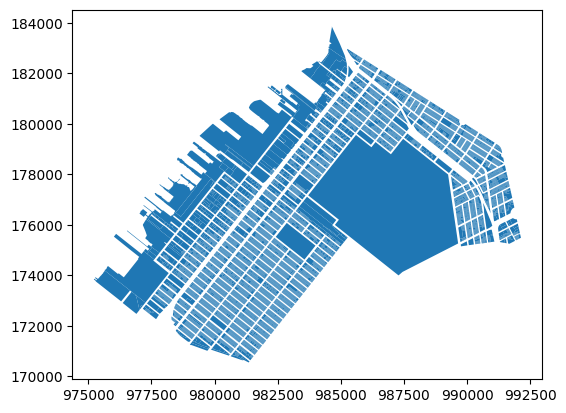

In [69]:
cb_307.plot()

In [70]:
# get maximum bounding geometry for all tax lots
bounds = cb_307.total_bounds

In [71]:
bounds_poly = gpd.GeoSeries(
    Polygon(
        [
            [bounds[0], bounds[1]],
            [bounds[0], bounds[3]],
            [bounds[2], bounds[3]],
            [bounds[2], bounds[1]],
            [bounds[0], bounds[1]],
        ]
    )
)

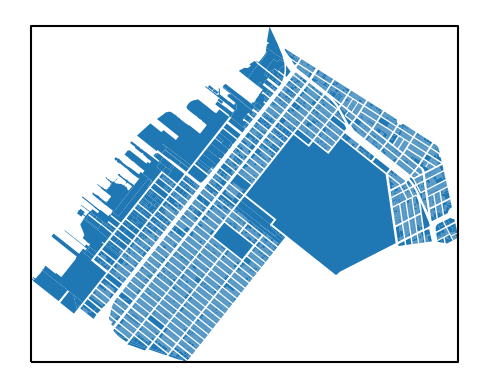

In [72]:
ax = cb_307.plot()
bounds_poly.boundary.plot(ax=ax, color="black").set_axis_off()

In [73]:
bounds_poly

0    POLYGON ((975222.902 170552.422, 975222.902 18...
dtype: geometry

In [74]:
bounds_poly.crs

In [75]:
bounds_poly.crs = cb_307.crs

In [76]:
cb_307.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [77]:
bounds_poly.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## reproject


In [78]:
bounds_poly_wgs84 = bounds_poly.to_crs("EPSG:4326")

In [79]:
cb_307_bldgs = ogr.read_dataframe(
    "../Data/Building Footprints.geojson",
    mask=bounds_poly_wgs84[0],
)

<Axes: >

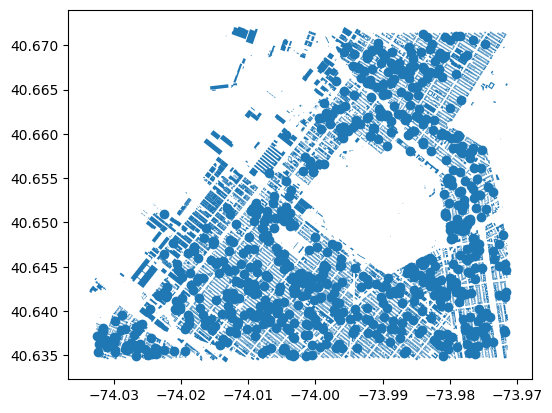

In [80]:
cb_307_bldgs.plot()

<Axes: >

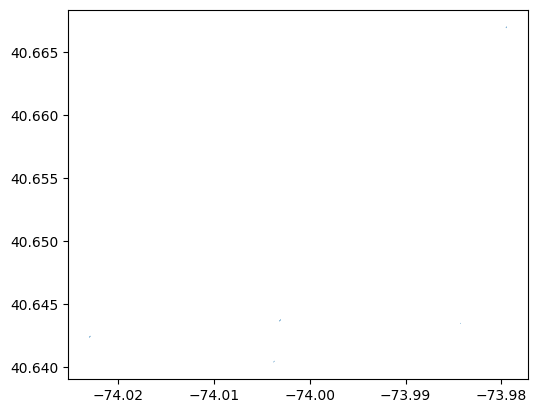

In [81]:
cb_307_bldgs.sample(5).plot()

In [82]:
cb_307_bldgs = cb_307_bldgs[cb_307_bldgs.geometry.type != "Point"]

<Axes: >

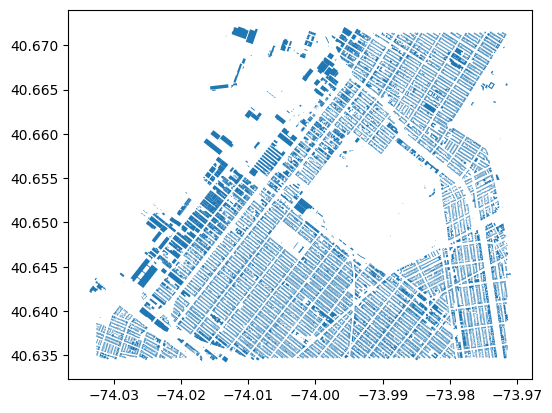

In [83]:
cb_307_bldgs.plot()

In [84]:
cb_307_bldgs = cb_307_bldgs.to_crs(cb_307.crs)

## spatial join


In [85]:
cb_307_bldgs["rep_pt"] = cb_307_bldgs.representative_point()
cb_307_bldgs.set_geometry("rep_pt", inplace=True)

In [86]:
cb_307_bldgs.base_bbl.nunique(), cb_307_bldgs.shape[0], cb_307_bldgs.globalid.nunique()

(26358, 30110, 30110)

In [87]:
cb_307_bldgs

,name,base_bbl,shape_area,heightroof,mpluto_bbl,cnstrct_yr,globalid,lststatype,feat_code,groundelev,geomsource,bin,lstmoddate,doitt_id,shape_len,geometry,rep_pt
0,None,3008130054,0.0,31.05,3008130054,1901,{C2B6150A-AA05-4865-B836-9DFA5C153E9C},Constructed,2100,48,Photogramm,3014166,2017-08-22,392052,0.0,"MULTIPOLYGON (((979424.884 174653.762, 979393....",POINT (979402.531 174638.9)
1,None,3010120038,0.0,42.44,3010120038,1921,{65E24ABD-485B-4B01-B70E-5ACA0E221B53},Constructed,2100,115,Photogramm,3022371,2017-08-22,743038,0.0,"MULTIPOLYGON (((989250.122 182249.393, 989226....",POINT (989230.47 182235.219)
2,None,3053130127,0.0,26.38239517,3053130127,1940,{454D03AE-5F41-4886-A5C5-74DD122005EF},Constructed,2100,57,Photogramm,3123939,2017-08-22,785686,0.0,"MULTIPOLYGON (((989342.25 173309.206, 989328.4...",POINT (989345.27 173325.92)
3,None,3058710090,0.0,24.71,3058710090,1920,{F02017F9-C56E-4793-96D1-03741F2569AC},Constructed,2100,73,Photogramm,3145644,2017-08-22,560761,0.0,"MULTIPOLYGON (((976372.261 170905.43, 976404.2...",POINT (976382.124 170892.831)
4,None,3058850095,0.0,26.79,3058850095,1925,{D97E7A81-466F-47F7-9159-D52052EC7129},Constructed,2100,68,Photogramm,3146300,2017-08-22,541427,0.0,"MULTIPOLYGON (((975991.817 170852.23, 975985.9...",POINT (975969.477 170848.875)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30105,None,3055910017,0.0,60.0,3055917508,2008,{F565CBEB-73A0-4C8B-8ACF-D7E26DEDFB03},Constructed,2100,74,Other (Man,3394074,2024-05-29,1100472,0.0,"MULTIPOLYGON (((986063.897 173535.911, 986025....",POINT (986034.911 173520.284)
30106,None,3006390016,0.0,None,3006390016,2021,{019343C0-3AC3-47DE-9C68-0011F8B5B7AD},Constructed,2100,18,Other (Man,3009227,2024-05-03,1294399,0.0,"MULTIPOLYGON (((985148.458 181241.335, 985161....",POINT (985116.244 181187.492)
30107,None,3007280036,0.0,60.0,3007280036,2024,{041C01B4-5A94-46C4-A3BB-0457C706C8BC},Constructed,2100,63,Other (Man,3426350,2024-06-20,1302168,0.0,"MULTIPOLYGON (((981766.623 176163.648, 981761....",POINT (981725.644 176235.773)
30108,None,3010510039,0.0,120.0,3010510039,2023,{0007187C-0E44-4204-AFE4-F9C3FC0C1DA8},Constructed,2100,46,Other (Man,3024085,2024-06-18,1302163,0.0,"MULTIPOLYGON (((986145.791 181865.976, 986188....",POINT (986220.175 181831.511)


In [88]:
cb_307_bldgs.base_bbl.nunique(),cb_307_bldgs.base_bbl.nunique(), cb_307_bldgs.globalid.nunique(),

(26358, 26358, 30110)

In [89]:
bldgs_w_lot = cb_307_bldgs[["globalid","mpluto_bbl","rep_pt"]].sjoin_nearest(
   cb_307, how="inner"
)

In [90]:
## spatial join buildings to tax lots based on building representative point
bldgs_w_lot = cb_307_bldgs[["globalid", "mpluto_bbl", "rep_pt"]].sjoin(
    cb_307, how="inner"
)

In [91]:
bldgs_w_lot_nearest = cb_307_bldgs[["globalid", "mpluto_bbl", "rep_pt"]].sjoin_nearest(
    cb_307, how="left", distance_col="distance"
)

<Axes: >

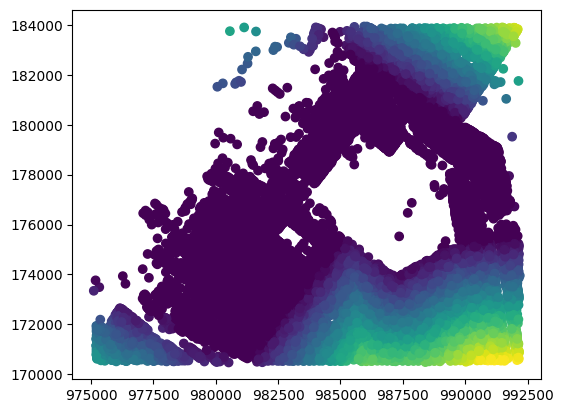

In [92]:
bldgs_w_lot_nearest.plot("distance")

<Axes: >

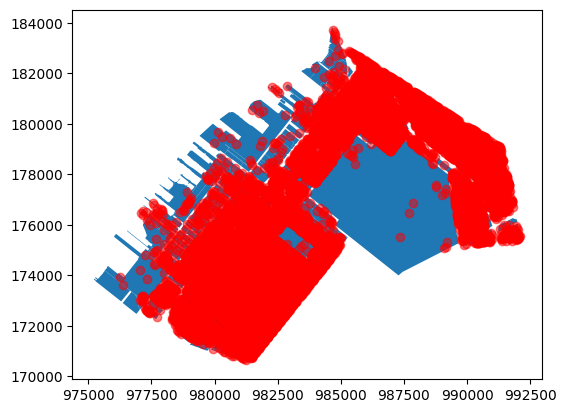

In [93]:
ax = cb_307.plot()
bldgs_w_lot.plot(ax=ax, color="red", alpha=0.5)

In [94]:
ss = cb_307_bldgs.sample()


In [ ]:
## drop cases where there is no match (i.e. no tax lot for buildings)

In [95]:
# now, join back to original building footprints
bldgs_w_lot = bldgs_w_lot.drop(columns=["rep_pt"]).merge(
    cb_307_bldgs, on="globalid", how="left"
)

In [96]:
bldgs_w_lot_gdf = gpd.GeoDataFrame(bldgs_w_lot, geometry="geometry")

In [97]:
cmap = {
    "One & Two Family Buildings": "#ff0000",
    "Multi-Family Walk-Up Buildings": "#00ff00",
    "Multi-Family Elevator Buildings": "#0000ff",
    "Mixed Residential & Commercial Buildings": "#ff00ff",
    "Commercial & Office Buildings": "#00ffff",
    "Industrial & Manufacturing": "#ffff00",
    "Transportation & Utility": "#808080",
    "Public Facilities & Institutions": "#800000",
    "Open Space & Outdoor Recreation": "#008000",
    "Parking Facilities": "#000080",
    "Vacant Land": "#800080",
    "Unknown": "#000000",
}

In [98]:
cmap_rgb = {k: list(int(v[i : i + 2], 16) for i in (1, 3, 5)) for k, v in cmap.items()}

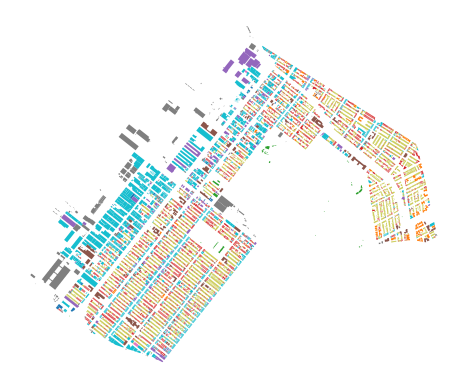

In [99]:
bldgs_w_lot_gdf.plot(column="color", legend=False).set_axis_off()

In [100]:
bldgs_w_lot_gdf.fillna({"LandUse": "Unknown"}, inplace=True)

In [101]:
cmap_rgb

{'One & Two Family Buildings': [255, 0, 0],
 'Multi-Family Walk-Up Buildings': [0, 255, 0],
 'Multi-Family Elevator Buildings': [0, 0, 255],
 'Mixed Residential & Commercial Buildings': [255, 0, 255],
 'Commercial & Office Buildings': [0, 255, 255],
 'Industrial & Manufacturing': [255, 255, 0],
 'Transportation & Utility': [128, 128, 128],
 'Public Facilities & Institutions': [128, 0, 0],
 'Open Space & Outdoor Recreation': [0, 128, 0],
 'Parking Facilities': [0, 0, 128],
 'Vacant Land': [128, 0, 128],
 'Unknown': [0, 0, 0]}

In [102]:
# make a lonboard plot with color based on land use and height based on number of floors
heights = bldgs_w_lot_gdf["heightroof"].astype(float).to_numpy()
bldgs_layer = PolygonLayer.from_geopandas(
    bldgs_w_lot_gdf[["geometry", "LandUse"]],
    get_fill_color=apply_categorical_cmap(bldgs_w_lot_gdf["LandUse"], cmap=cmap_rgb),
    extruded=True,
    get_elevation=heights,
)

m = Map(
    [bldgs_layer],
    view_state={
        "pitch": 45,
        "zoom": 14,
        "latitude": 40.6459406,
        "longitude": -74.0151512,
    },
)
m

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/lonboard/_geoarrow/ops/reproject.py:97: UserWarning: Input being reprojected to EPSG:4326 CRS
  warnings.warn("Input being reprojected to EPSG:4326 CRS")


Map(layers=[PolygonLayer(extruded=True, get_elevation=<pyarrow.lib.FloatArray object at 0x336c3eda0>
[
  31.05…

## attribute join


... sometimes it makes more sense to join based on attributes rather than spatial relationships. This is one of those cases.


In [103]:
cb_307_bldgs.mpluto_bbl.nunique(), cb_307.shape

(26321, (13284, 97))

In [104]:
cb_307.columns

Index(['Borough', 'Block', 'Lot', 'CD', 'BCT2020', 'BCTCB2020', 'CT2010',
       'CB2010', 'SchoolDist', 'Council', 'ZipCode', 'FireComp', 'PolicePrct',
       'HealthCent', 'HealthArea', 'Sanitboro', 'SanitDistr', 'SanitSub',
       'Address', 'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4',
       'Overlay1', 'Overlay2', 'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight',
       'SplitZone', 'BldgClass', 'LandUse', 'Easements', 'OwnerType',
       'OwnerName', 'LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea',
       'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea',
       'AreaSource', 'NumBldgs', 'NumFloors', 'UnitsRes', 'UnitsTotal',
       'LotFront', 'LotDepth', 'BldgFront', 'BldgDepth', 'Ext', 'ProxCode',
       'IrrLotCode', 'LotType', 'BsmtCode', 'AssessLand', 'AssessTot',
       'ExemptTot', 'YearBuilt', 'YearAlter1', 'YearAlter2', 'HistDist',
       'Landmark', 'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode',
       'BBL', 'CondoNo', 'Tract2

In [105]:
cb_307_bldgs.mpluto_bbl.dtype, cb_307.BBL.dtype

(dtype('O'), dtype('float64'))

In [106]:
cb_307_bldgs["mpluto_bbl"] = cb_307_bldgs["mpluto_bbl"].astype(float)

In [107]:
bldgs_w_lot_attrib = cb_307_bldgs.merge(
    cb_307, left_on="mpluto_bbl", right_on="BBL", how="inner"
)

In [108]:
# assert bldgs_w_lot_attrib.shape == bldgs_w_lot_gdf.shape
bldgs_w_lot_attrib.shape == bldgs_w_lot_gdf.shape

False

<Axes: >

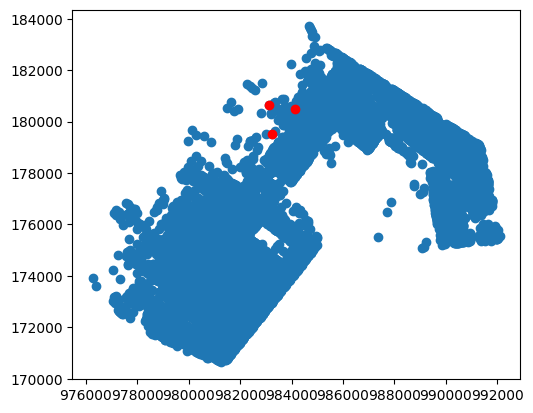

In [109]:
# find the globalid of the buildings in bldgs_w_lot_attrib that are not in bldgs_w_lot_gdf
ax = bldgs_w_lot_attrib.plot()
bldgs_w_lot_attrib[~bldgs_w_lot_attrib.globalid.isin(bldgs_w_lot_gdf.globalid)].plot(
    ax=ax, color="red"
)

In [110]:
missing_buildings = bldgs_w_lot_attrib[
    ~bldgs_w_lot_attrib.globalid.isin(bldgs_w_lot_gdf.globalid)
].globalid.unique()

In [123]:
missing_buildings

array(['{5BA6B597-2763-493D-878C-A310997C62D1}',
       '{4661736C-007A-49C3-9E92-7E39576F9255}',
       '{F856BB3E-ED5E-4966-B2D2-C2520BB0F7AB}'], dtype=object)

In [125]:
len(missing_bldgs)

3

In [126]:
bldgs_w_lot_attrib["geometry"] = bldgs_w_lot_attrib["geometry_x"]

In [127]:
bldgs_w_lot_attrib.set_geometry("geometry", inplace=True)

### investigate- what's going on??


In [122]:
# make a lonboard plot with color based on land use and height based on number of floors

missing_bldgs = bldgs_w_lot_attrib[bldgs_w_lot_attrib.globalid.isin(missing_buildings)]

heights_missing = missing_bldgs["heightroof"].astype(float).to_numpy()

lots_layer = PolygonLayer.from_geopandas(
    cb_307[["geometry", "LandUse"]],
    get_fill_color=apply_categorical_cmap(cb_307["LandUse"], cmap=cmap_rgb),
)

missing_bldgs_layer = PolygonLayer.from_geopandas(
    missing_bldgs[["geometry", "LandUse"]],
    get_fill_color=[255, 0, 0, 155],
    extruded=True,
    get_elevation=heights_missing,
)

m = Map(
    [missing_bldgs_layer, lots_layer],
    view_state={
        "pitch": 45,
        "zoom": 14,
        "latitude": 40.6459406,
        "longitude": -74.0151512,
    },
)
m

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/lonboard/_geoarrow/ops/reproject.py:97: UserWarning: Input being reprojected to EPSG:4326 CRS
  warnings.warn("Input being reprojected to EPSG:4326 CRS")
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/lonboard/_geoarrow/ops/reproject.py:97: UserWarning: Input being reprojected to EPSG:4326 CRS
  warnings.warn("Input being reprojected to EPSG:4326 CRS")


Map(layers=[PolygonLayer(extruded=True, get_elevation=<pyarrow.lib.FloatArray object at 0x319a80b20>
[
  14.24…

So we can see that there are three cases where buildings are associated with lots, even if their representative point (or entire geometry) fall outside of the actual polygon.


## dissolve


Learn more about dissolve here: https://geopandas.org/en/stable/docs/user_guide/aggregation_with_dissolve.html


In [115]:
cb_307_by_owner = cb_307.dissolve(
    by="OwnerName",
    aggfunc={
        "LandUse": list,
        "LotArea": "sum",
    },
).reset_index()

Text(0.5, 1.0, 'Top 10 Owners by Lot Area')

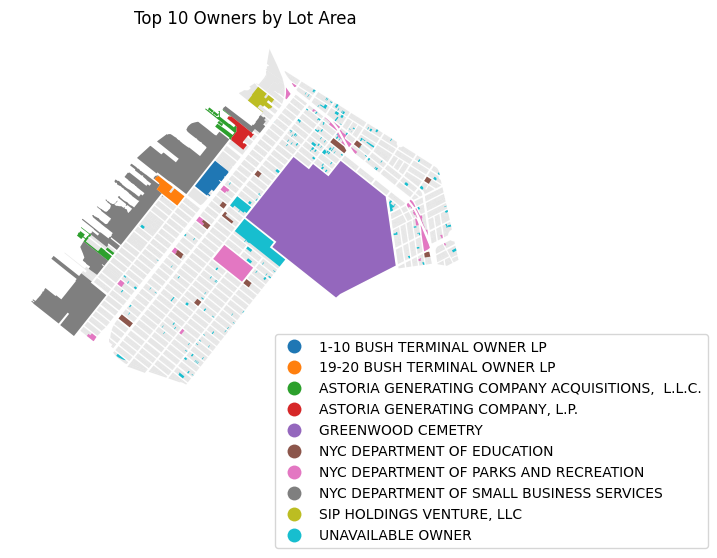

In [117]:
fig, ax = plt.subplots()
cb_307.plot(color="#cecece", ax=ax, alpha=0.5)

cb_307_by_owner.sort_values("LotArea", ascending=False).head(10).plot(
    column="OwnerName", legend=True, ax=ax
).set_axis_off()


# get legend item
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.0, 0.0, 0.5, 0.2))
ax.set_title("Top 10 Owners by Lot Area")
# put legend off the plot
# cb_307_by_owner.plot(column="OwnerName", legend=False)

In [118]:
cb_307_by_owner

,OwnerName,geometry,LandUse,LotArea
0,*** NO OWNER FOUND ***,"POLYGON ((980590.724 174235.587, 980527.813 17...",[One & Two Family Buildings],2003
1,1-10 BUSH TERMINAL OWNER LP,"POLYGON ((982202.987 178074.791, 982200.638 17...","[Commercial & Office Buildings, Industrial & M...",722097
2,10 E 4TH STREET LLC,"POLYGON ((990181.201 176930.755, 990282.152 17...",[Multi-Family Walk-Up Buildings],2050
3,10-16 OCEAN REALTIES,"POLYGON ((991792.749 176633.932, 991787.15 176...",[Multi-Family Elevator Buildings],42968
4,100 19TH STREET,"POLYGON ((989711.736 177970.244, 989649.158 17...",[Multi-Family Walk-Up Buildings],6010
...,...,...,...,...
12136,"ZWERLING, CARA","POLYGON ((990576.588 178737.293, 990630.331 17...",[One & Two Family Buildings],2000
12137,"ZWICK, ELAINE R","POLYGON ((990085.407 178976.26, 990103.152 178...",[Multi-Family Walk-Up Buildings],2000
12138,ZWL REALTY LLC,"POLYGON ((983015.618 174308.387, 982951.592 17...",[Multi-Family Walk-Up Buildings],2003
12139,ZY MANAGEMENT LLC,"POLYGON ((981487.36 171696.522, 981474.555 171...",[Mixed Residential & Commercial Buildings],2017


## Intersect / Difference


In [119]:
sample_block = cb_307.Block.sample(1).values[0]

In [120]:
sample_block

825

In [121]:
cb_307_bldgs.columns

Index(['name', 'base_bbl', 'shape_area', 'heightroof', 'mpluto_bbl',
       'cnstrct_yr', 'globalid', 'lststatype', 'feat_code', 'groundelev',
       'geomsource', 'bin', 'lstmoddate', 'doitt_id', 'shape_len', 'geometry',
       'rep_pt'],
      dtype='object')

In [128]:
sample_block_lots = cb_307[cb_307.Block.eq(sample_block)].copy()
sample_block_bldgs = cb_307_bldgs[
    cb_307_bldgs.mpluto_bbl.isin(sample_block_lots.BBL.unique())
].copy()

In [129]:
sample_block_bldgs.set_geometry("geometry", inplace=True)

Text(0.5, 1.0, 'Block 825')

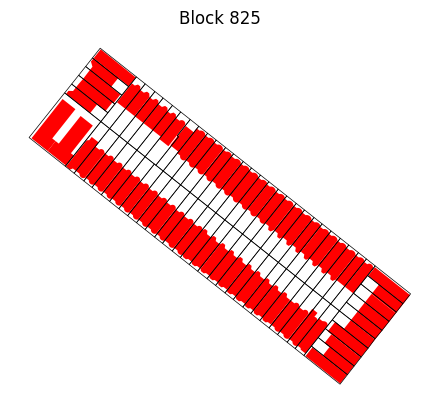

In [139]:
ax = sample_block_lots.boundary.plot(color="black", linewidth=0.5)
sample_block_bldgs.plot(ax=ax, color="red").set_axis_off()

ax.set_title(f"Block {sample_block}")

In [135]:
sample_block_non_bldg = sample_block_lots.difference(sample_block_bldgs.unary_union)

/var/folders/yh/wt89cp_n00zc5wpkkv_s7wrw0000gn/T/ipykernel_31754/3284385118.py:1: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  sample_block_non_bldg = sample_block_lots.difference(sample_block_bldgs.unary_union)


In [136]:
sample_block_non_bldg.shape

(70,)

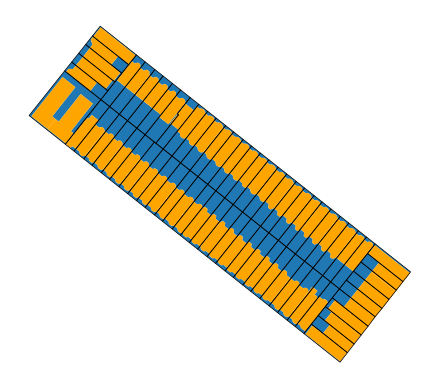

In [137]:
ax = sample_block_lots.boundary.plot(color="black", linewidth=0.5)
sample_block_non_bldg.plot(ax=ax)
sample_block_bldgs.plot(ax=ax, color="orange").set_axis_off()

In [140]:
sample_block_non_bldg_intersect = sample_block_lots.intersection(
    sample_block_bldgs.unary_union
)

/var/folders/yh/wt89cp_n00zc5wpkkv_s7wrw0000gn/T/ipykernel_31754/2781225839.py:2: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  sample_block_bldgs.unary_union


In [141]:
sample_block_non_bldg_intersect.shape

(70,)

<Axes: >

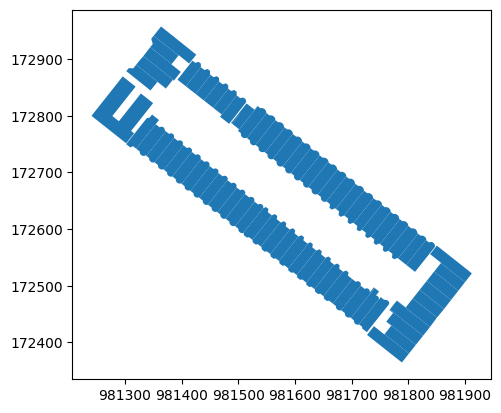

In [142]:
sample_block_non_bldg_intersect.plot()

## Union


In [143]:
sample_block_lots["lot_area"] = sample_block_lots.area

In [144]:
lots_bldgs_union = gpd.overlay(sample_block_lots, sample_block_bldgs, how="union")

/var/folders/yh/wt89cp_n00zc5wpkkv_s7wrw0000gn/T/ipykernel_31754/3882292701.py:1: UserWarning: `keep_geom_type=True` in overlay resulted in 2 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  lots_bldgs_union = gpd.overlay(sample_block_lots, sample_block_bldgs, how="union")


In [145]:
lots_bldgs_union.shape

(239, 114)

In [146]:
import pandas as pd

In [147]:
lots_bldgs_union

,Borough,Block,Lot,CD,BCT2020,BCTCB2020,CT2010,CB2010,SchoolDist,Council,...,lststatype,feat_code,groundelev,geomsource,bin,lstmoddate,doitt_id,shape_len,rep_pt,geometry
0,BK,825.0,12.0,307.0,3010000,30100002000,100,2000,15,43.0,...,Constructed,2100,138,Photogramm,3014723,2017-08-22,32695,0.0,POINT (981415.055 172876.422),"POLYGON ((981407.521 172851.964, 981406.366 17..."
1,BK,825.0,10.0,307.0,3010000,30100002000,100,2000,15,43.0,...,Constructed,2100,139,Photogramm,3014721,2017-08-22,752109,0.0,POINT (981369.752 172913.712),"POLYGON ((981350.672 172941.025, 981351.293 17..."
2,BK,825.0,10.0,307.0,3010000,30100002000,100,2000,15,43.0,...,Constructed,2100,139,Photogramm,3014722,2017-08-22,631575,0.0,POINT (981388.613 172924.725),"POLYGON ((981351.293 172941.8, 981363.794 1729..."
3,BK,825.0,9.0,307.0,3010000,30100002000,100,2000,15,43.0,...,Constructed,2100,139,Photogramm,3014721,2017-08-22,752109,0.0,POINT (981369.752 172913.712),"POLYGON ((981344.74 172921.01, 981349.149 1729..."
4,BK,825.0,8.0,307.0,3010000,30100002000,100,2000,15,43.0,...,Constructed,2100,137,Photogramm,3014720,2017-08-22,743554,0.0,POINT (981358.747 172896.519),"POLYGON ((981332.614 172905.188, 981335.041 17..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Constructed,2100,116,Photogramm,3014755,2017-08-22,430410,0.0,POINT (981821.853 172453.068),"POLYGON ((981847.192 172438.593, 981838.449 17..."
235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Constructed,2100,118,Photogramm,3014761,2017-08-22,322165,0.0,POINT (981718.843 172455.103),"POLYGON ((981698.74 172443.265, 981698.74 1724..."
236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Constructed,2100,116,Photogramm,3014756,2017-08-22,149878,0.0,POINT (981800.875 172443.652),"POLYGON ((981838.434 172427.566, 981838.449 17..."
237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Constructed,2100,126,Photogramm,3014739,2017-08-22,473052,0.0,POINT (981665.017 172677.167),"MULTIPOLYGON (((981640.338 172661.069, 981675...."


<Axes: >

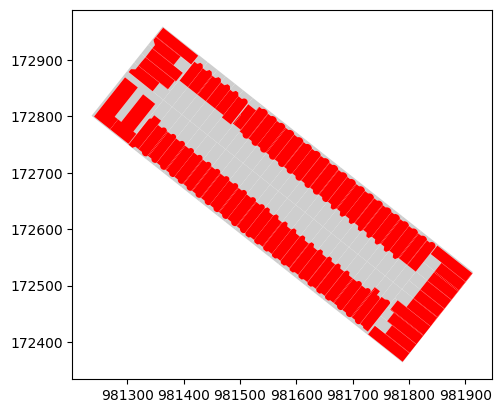

In [148]:
ax = lots_bldgs_union[lots_bldgs_union.globalid.isna()].plot(color="#cecece")
lots_bldgs_union[lots_bldgs_union.globalid.notna()].plot(ax=ax, color="red")

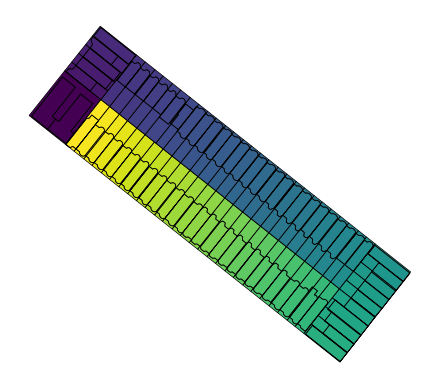

In [149]:
ax = lots_bldgs_union[lots_bldgs_union.globalid.isna()].plot("Lot")
lots_bldgs_union[lots_bldgs_union.globalid.notna()].plot("Lot", ax=ax)
lots_bldgs_union.boundary.plot(color="black", ax=ax, linewidth=0.5).set_axis_off()

In [150]:
lots_bldgs_union.globalid.unique()

array(['{580023EB-F3EB-4E15-98BB-5899FCC8BD7B}',
       '{AA0D50FB-C31A-43BE-8572-4EC0B2E320F9}',
       '{4DE9E2AB-7A6E-4942-A2CB-D96339A57354}',
       '{6E11FBD4-E14F-461A-B7C7-7032F615E50A}',
       '{39879D41-7B6E-46E6-9764-1D61E2950657}',
       '{4A249960-2380-4488-99E3-938A092F77AC}',
       '{17BF8DE3-7D42-4102-9AD3-4B042708355C}',
       '{1EB85E9C-5BCC-4429-9F6F-BE556F252D67}',
       '{C1031001-AEB3-4D9F-8A3A-544C243C48F8}',
       '{D9187301-372C-4F6E-96BE-E222D6BA5CC6}',
       '{810083CC-9E62-43A1-9480-4DFCEC742479}',
       '{671957D5-122A-4290-ACCD-D162F59D9EDF}',
       '{B1C6A7CA-2280-41B8-833C-7D48A6D77FD8}',
       '{2F060047-61E0-4EA1-B0CB-61D5310B8550}',
       '{D5BAF812-E215-421D-AA73-9F5ADFAFA220}',
       '{1DF16AE0-AB4F-4EE7-91AD-7FFCA0EF97F1}',
       '{8DB96D3F-24F0-4631-BBFB-3712DD4EC976}',
       '{37E90DD0-39C2-40B6-8871-5FEB238462D7}',
       '{BF66808D-4A1A-42D4-A013-2A0ADE31DC69}',
       '{69B5F251-F9DF-47AB-A03F-1CDF76365AFA}',
       '{6ABC2AF5-14

In [151]:
lots_bldgs_union["pct_bldg_lot_coverage"] = lots_bldgs_union.apply(
    lambda x: ((x.geometry.area / x.lot_area) * 100 if type(x.globalid) == str else -1),
    axis=1,
)

<Axes: >

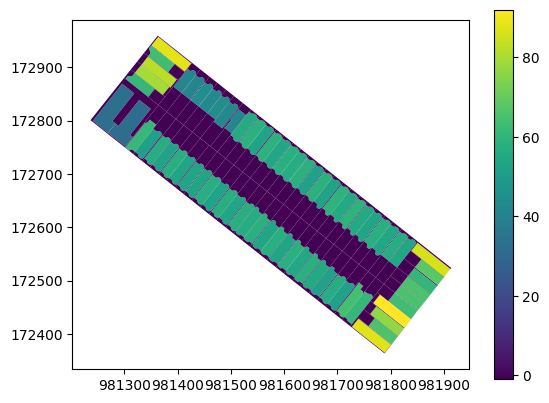

In [152]:
lots_bldgs_union.plot("pct_bldg_lot_coverage", legend=True)

## calculate soft sites (create new attributes)


In [153]:
def is_soft_site(r, threshold=0.33):
    if (
        r.BuiltFAR <= r.ResidFAR * threshold
        and r.LotArea > 10000
        and r.LandUse != "Open Space & Outdoor Recreation"
        and r.ResidFAR > 0
    ):
        return 1
    else:
        return 0

In [154]:
cb_307["soft_site"] = cb_307.apply(is_soft_site, axis=1)

In [155]:
cb_307["soft_site"].value_counts()

soft_site
0    13251
1       33
Name: count, dtype: int64

<Axes: >

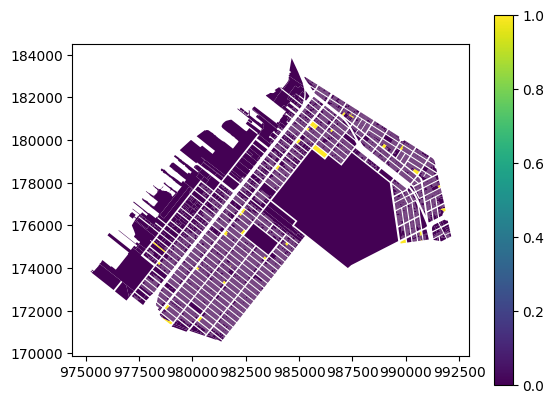

In [156]:
cb_307.plot("soft_site", legend=True)

In [157]:
cb_307[cb_307.soft_site.eq(1)][["soft_site", "BuiltFAR", "ResidFAR"]]

,soft_site,BuiltFAR,ResidFAR
116,1,0.05,1.25
125,1,0.69,2.43
529,1,0.18,4.00
538,1,0.59,3.00
796,1,0.41,1.35
1642,1,0.97,6.02
1656,1,0.09,2.00
1696,1,0.00,6.02
1738,1,0.40,2.00
1905,1,0.32,2.00
